In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
df = pd.read_csv('data/master.csv')

In [4]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [5]:
plt.rcParams.update({'font.size': 16})

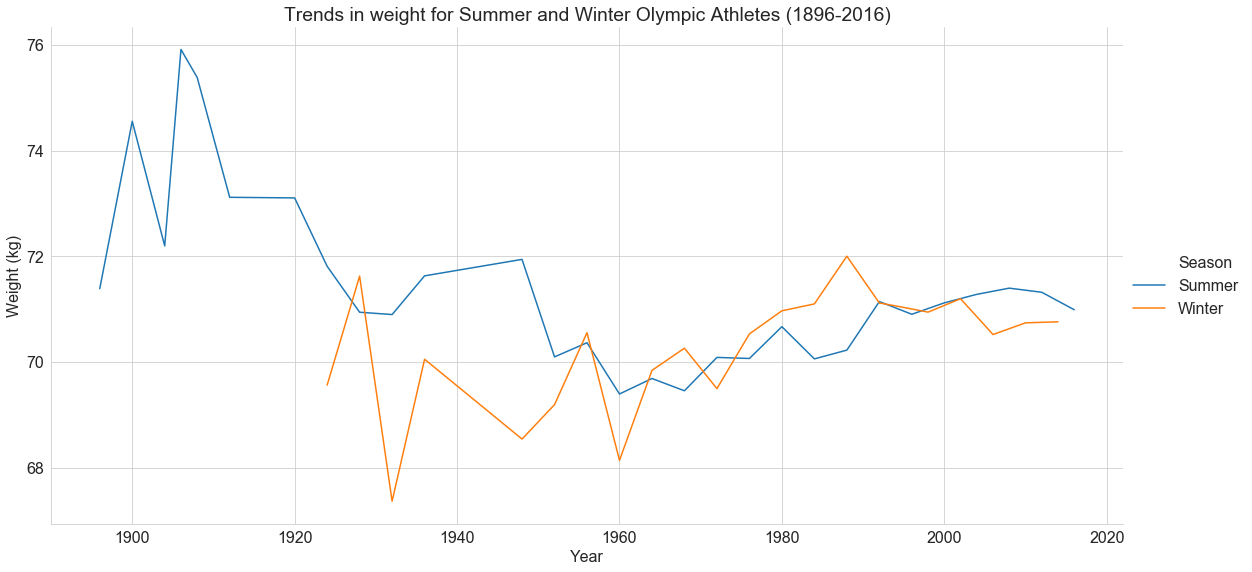

In [6]:
# Weight distribution for Olympic Athletes: A seasonal perspective
# fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Weight", kind="line", ci=None, hue='Season', data=df, height=8, aspect=2)
plt.title('Trends in weight for Summer and Winter Olympic Athletes (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.savefig('plots/weight/weight_season_line.png')
plt.show(g)
# plt.close(g.fig)

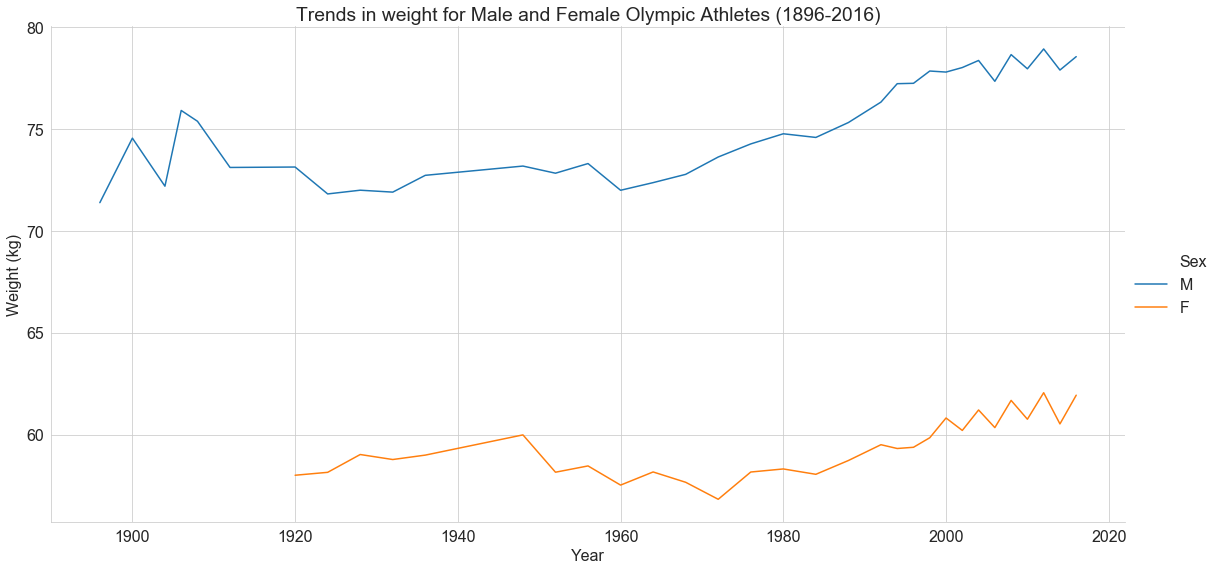

In [7]:
# Weight distribution for Olympic Athletes: A gender perspective
# fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Weight", kind="line", ci=None, hue='Sex', data=df, height=8, aspect=2)
plt.title('Trends in weight for Male and Female Olympic Athletes (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.savefig('plots/weight/weight_gender_line.png')
plt.show(g)
# plt.close(g.fig)

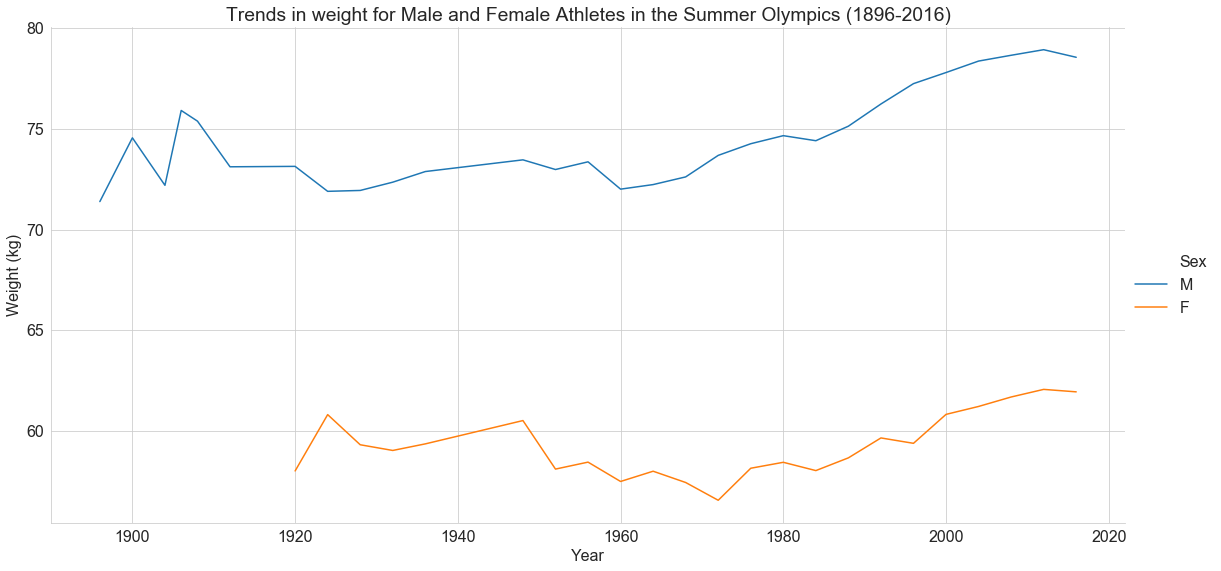

In [8]:
# Trends in weight for Summer Olympic Athletes: A gender perspective
# fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Weight", kind="line", ci=None, hue='Sex', data=summer_df, height=8, aspect=2)
plt.title('Trends in weight for Male and Female Athletes in the Summer Olympics (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.savefig('plots/weight/weight_summer_gender_line.png')
plt.show(g)
# plt.close(g.fig)

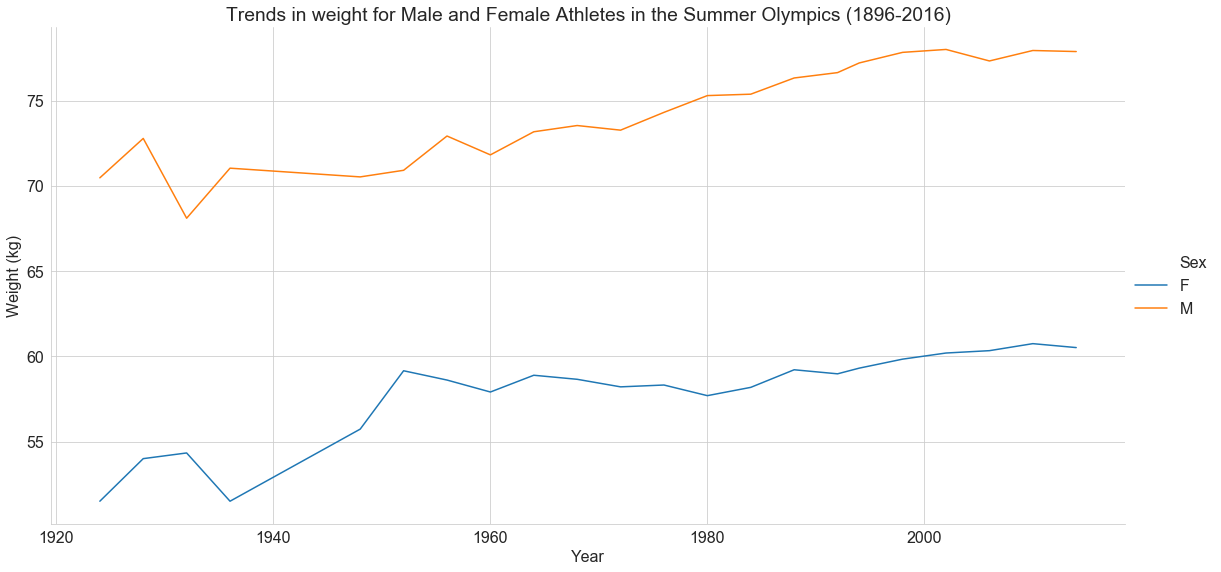

In [9]:
# Trends in weight for Winter Olympic Athletes: A gender perspective
# fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Weight", kind="line", ci=None, hue='Sex', data=winter_df, height=8, aspect=2)
plt.title('Trends in weight for Male and Female Athletes in the Summer Olympics (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.savefig('plots/weight/weight_winter_gender_line.png')
plt.show(g)
# plt.close(g.fig)

In [10]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [11]:
weight_df = df[['Year','Weight','Sex','Season']]

In [12]:
# Distribution of Weight for all Olympic Athletes (1896-2016)
chart = alt.Chart(weight_df).mark_bar().encode(
    alt.X('Weight:Q', bin=alt.Bin(maxbins=60), title='Weight (kg)'),
    alt.Y('count():Q'),
    alt.Color('count(Weight):Q', scale=alt.Scale(scheme='plasma'))
)

In [13]:
chart = chart.properties(title='Distribution of Weight for all Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

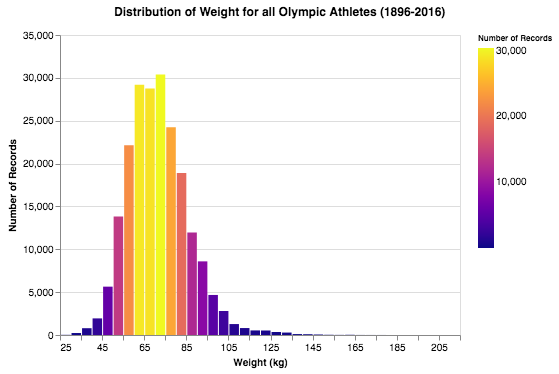

In [14]:
chart

In [15]:
chart.save('plots/weight/weight_histogram.png', scale_factor=7.0)

In [16]:
chart = alt.Chart(weight_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Weight:Q', bin=alt.Bin(maxbins=60), title='Weight (kg)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 28000])),
    alt.Color('Sex:N')
)

In [17]:
chart = chart.properties(title='Distribution of Weight for Male and Female Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

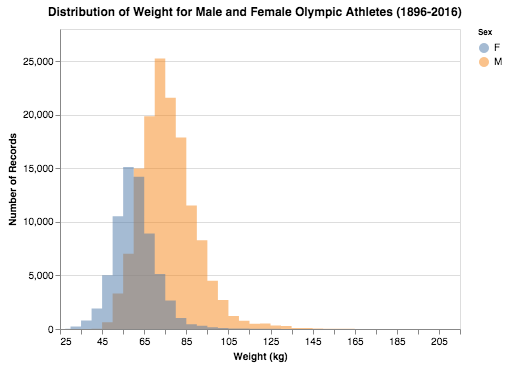

In [18]:
chart

In [19]:
chart.save('plots/weight/weight_gender_area.png', scale_factor=7.0)

In [20]:
chart = alt.Chart(weight_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Weight:Q', bin=alt.Bin(maxbins=60), title='Weight (kg)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 25000])),
    alt.Color('Season:N')
)

In [21]:
chart = chart.properties(title='Distribution of Weight for Summer and Winter Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

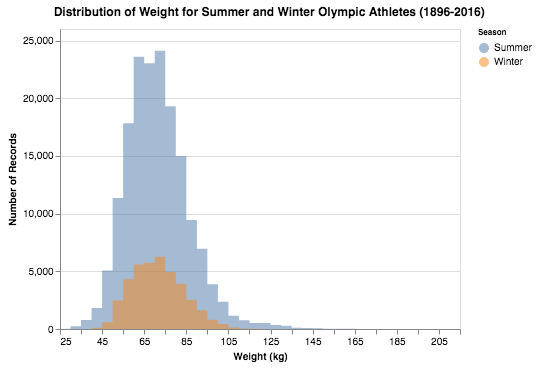

In [22]:
chart

In [23]:
chart.save('plots/weight/weight_season_area.png', scale_factor=7.0)

In [24]:
summer_weight_df = summer_df[['Year','Weight','Sex','Season']]
winter_weight_df = winter_df[['Year','Weight','Sex','Season']]

In [25]:
chart = alt.Chart(summer_weight_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Weight:Q', bin=alt.Bin(maxbins=60), title='Weight (kg)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 20000])),
    alt.Color('Sex:N')
)

In [26]:
chart = chart.properties(title='Weight Distribution for Male and Female Athletes in the Summer Olympics (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

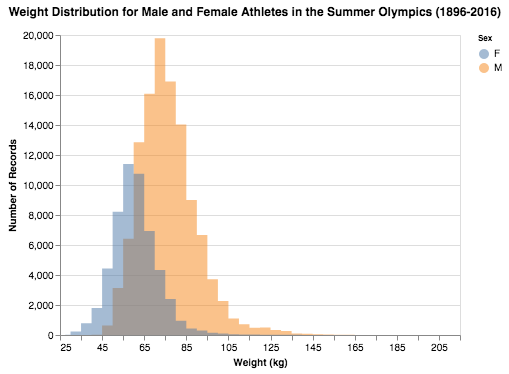

In [27]:
chart

In [28]:
chart.save('plots/weight/weight_summer_gender_area.png', scale_factor=7.0)

In [29]:
chart = alt.Chart(winter_weight_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Weight:Q', bin=alt.Bin(maxbins=60), title='Weight (kg)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 2600])),
    alt.Color('Sex:N')
)

In [30]:
chart = chart.properties(title='Weight Distribution for Male and Female Athletes in the Winter Olympics (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

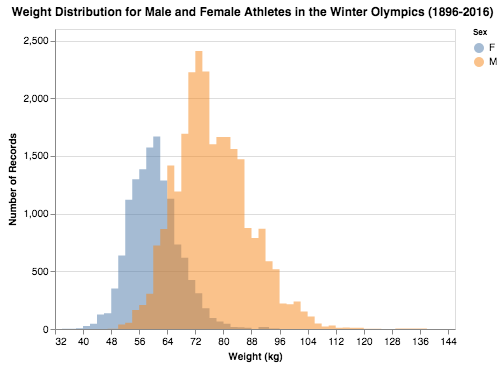

In [31]:
chart

In [32]:
chart.save('plots/weight/weight_winter_gender_area.png', scale_factor=7.0)

In [33]:
height_weight_df = summer_df[['Year','Weight','Sex','Season','Height']]

In [34]:
chart = alt.Chart(height_weight_df).mark_rect().encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60), title='Height (cm)'),
    alt.Y('Weight:Q', bin=alt.Bin(maxbins=60), title='Weight (kg)'),
    alt.Color('count(Height):Q', scale=alt.Scale(scheme='plasma'))
)

In [35]:
chart = chart.properties(title='Height and Weight Distribution for Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

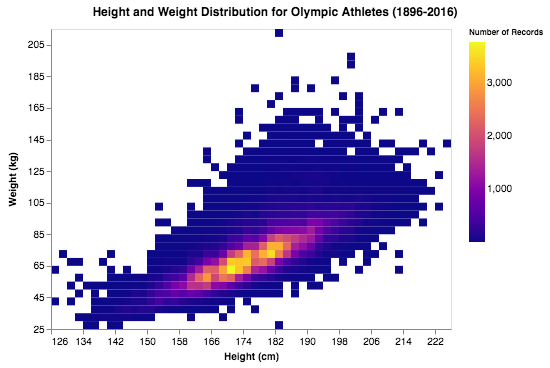

In [36]:
chart

In [37]:
chart.save('plots/weight/height_weight_joint.png', scale_factor=7.0)